In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
from sklearn.model_selection import train_test_split
from google.colab import auth
from sklearn.preprocessing import StandardScaler

In [ ]:
auth.authenticate_user()

In [ ]:
import gspread
from google.auth.transport.requests import Request

from google.auth import default

In [ ]:
creds, _ = default()
gc = gspread.authorize(creds)

spreadsheet = gc.open("cancer patient data sets")
worksheet = spreadsheet.sheet1

In [ ]:
data = worksheet.get_all_records()
df = pd.DataFrame(data)
print(df.head())

  Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0         P1   33       1              2            4             5   
1        P10   17       1              3            1             5   
2       P100   35       1              4            5             6   
3      P1000   37       1              7            7             7   
4       P101   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                     4             3                     2              2   
1                     3             4                     2              2   
2                     5             5                     4              6   
3                     7             6                     7              7   
4                     7             7                     6              7   

   ...  Fatigue  Weight Loss  Shortness of Breath  Wheezing  \
0  ...        3            4             

In [ ]:
print(df.isnull().sum())

Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64


In [ ]:
print(df.dtypes)

Patient Id                  object
Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                       object
dtype: object


In [ ]:
df = df.drop(columns=['Patient Id'])
df['Level'] = df['Level'].map({'Low':1,'Medium':2,'High':3})
correlation_matrix = df.corr()
print(correlation_matrix['Level'])

Age                         0.060048
Gender                     -0.164985
Air Pollution               0.636038
Alcohol use                 0.718710
Dust Allergy                0.713839
OccuPational Hazards        0.673255
Genetic Risk                0.701303
chronic Lung Disease        0.609971
Balanced Diet               0.706273
Obesity                     0.827435
Smoking                     0.519530
Passive Smoker              0.703594
Chest Pain                  0.645461
Coughing of Blood           0.782092
Fatigue                     0.625114
Weight Loss                 0.352738
Shortness of Breath         0.497024
Wheezing                    0.242794
Swallowing Difficulty       0.249142
Clubbing of Finger Nails    0.280063
Frequent Cold               0.444017
Dry Cough                   0.373968
Snoring                     0.289366
Level                       1.000000
Name: Level, dtype: float64


<Axes: xlabel='Level', ylabel='count'>

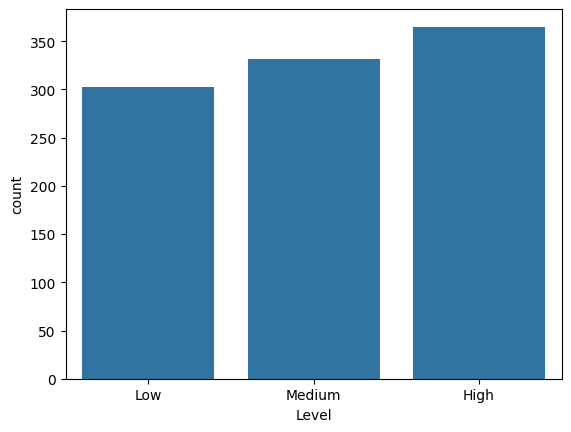

In [ ]:
sns.countplot(x='Level',data=df)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,5))
normalized_data = scaler.fit_transform(df.drop(columns=['Level']))
df_normalized = pd.DataFrame(normalized_data, columns=df.columns[:-1])

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [ ]:
x,y = df_normalized,df['Level']

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3)

In [ ]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        92
           2       1.00      1.00      1.00       106
           3       1.00      1.00      1.00       102

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn_model, x, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean score: 1.0


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 92   0   0]
 [  0 106   0]
 [  0   0 102]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
for i in range(1,100):
  clf = RandomForestClassifier(n_estimators = i,random_state=43,max_depth=5,max_features='sqrt')
  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  print(i,classification_report(y_pred,y_test))

1               precision    recall  f1-score   support

           1       0.92      0.97      0.94        88
           2       0.97      1.00      0.99       103
           3       1.00      0.94      0.97       109

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300

2               precision    recall  f1-score   support

           1       1.00      0.97      0.98        95
           2       0.97      1.00      0.99       103
           3       1.00      1.00      1.00       102

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

3               precision    recall  f1-score   support

           1       1.00      0.97      0.98        95
           2       0.97      1.00      0.99       103
           3       1.00      1.00      1.00       102

    accuracy  

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(clf, x, y, cv=skf)
print("Stratified CV Mean Score:", scores.mean())

Stratified CV Mean Score: 1.0


<Axes: >

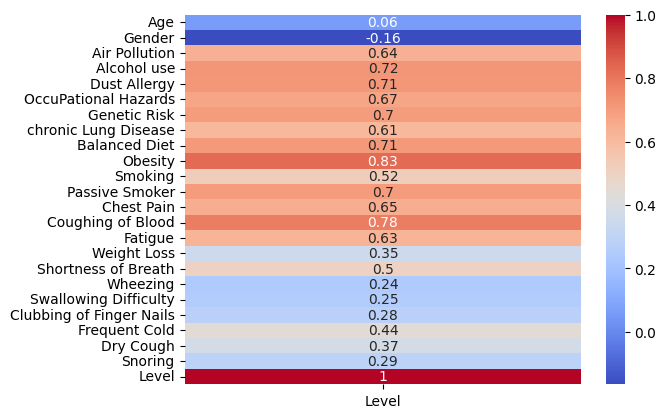

In [ ]:
sns.heatmap(df.corr()[['Level']],annot=True,cmap='coolwarm')

In [ ]:
for i in range(1,25):
  knn_model = KNeighborsClassifier(n_neighbors=i)
  knn_model.fit(x_train,y_train)
  y_pred = knn_model.predict(x_test)
  print(i,classification_report(y_pred,y_test))

1               precision    recall  f1-score   support

           1       0.99      1.00      0.99        91
           2       1.00      0.99      1.00       107
           3       1.00      1.00      1.00       102

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

2               precision    recall  f1-score   support

           1       0.99      1.00      0.99        91
           2       1.00      0.99      1.00       107
           3       1.00      1.00      1.00       102

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

3               precision    recall  f1-score   support

           1       0.99      1.00      0.99        91
           2       1.00      0.99      1.00       107
           3       1.00      1.00      1.00       102

    accuracy  

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=15)
knn_model.fit(x_train,y_train)
y_pred = knn_model.predict(x_test)
print(i,classification_report(y_pred,y_test))

99               precision    recall  f1-score   support

           1       0.92      0.98      0.95        87
           2       0.98      0.90      0.94       116
           3       0.95      1.00      0.97        97

    accuracy                           0.95       300
   macro avg       0.95      0.96      0.95       300
weighted avg       0.95      0.95      0.95       300



In [ ]:
clf = RandomForestClassifier(n_estimators = 1,random_state=43,max_depth=5,max_features='sqrt')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(i,classification_report(y_pred,y_test))

99               precision    recall  f1-score   support

           1       0.92      0.97      0.94        88
           2       0.97      1.00      0.99       103
           3       1.00      0.94      0.97       109

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300

